In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_path not in sys.path:
    sys.path.append(root_path)

print(root_path)
from src.features.featurize import FeatureEngineer

/home/joel/Documents/battery_predictor


## Evaluate Sample Events

In [3]:
df = pd.read_parquet("../data/sample_events.parquet")
df['ts'] = pd.to_datetime(df['ts'])
df.head()

,user_id,ts,battery_pct,hr,steps,usage_minutes,sync_event,acc_x,acc_y,acc_z,consumption_pct
0,1,2025-11-26 01:16:31.810131,36.816681,72,0,0.00,0,-0.236347,0.113535,-0.101701,0.076796
1,1,2025-11-26 01:17:31.810131,36.758862,69,0,0.67,0,0.088583,0.063190,0.004026,0.057820
2,1,2025-11-26 01:18:31.810131,36.684737,68,0,0.00,0,-0.017243,-0.087786,0.004221,0.074124
3,1,2025-11-26 01:19:31.810131,36.597476,72,0,0.00,0,-0.045452,-0.008534,0.150319,0.087261
4,1,2025-11-26 01:20:31.810131,36.533996,70,0,0.00,0,-0.091545,-0.006973,-0.084995,0.063480


In [3]:
# Samples per user
df.groupby('user_id').size().describe()

count     200.000000
mean     1063.435000
std       351.969899
min       311.000000
25%       758.000000
50%      1106.000000
75%      1440.000000
max      1440.000000
dtype: float64

<Axes: title={'center': 'user 6 battery over time'}, xlabel='ts'>

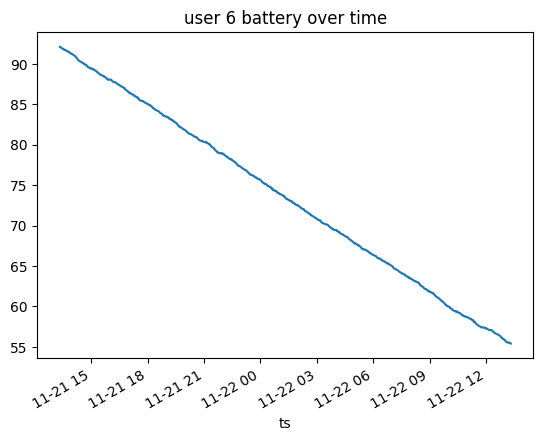

In [4]:
uid = df['user_id'].unique()[5]
sub = df[df['user_id']==uid].set_index('ts')
sub['battery_pct'].plot(title=f"user {uid} battery over time")

array([<Axes: xlabel='ts'>, <Axes: xlabel='ts'>, <Axes: xlabel='ts'>,
       <Axes: xlabel='ts'>], dtype=object)

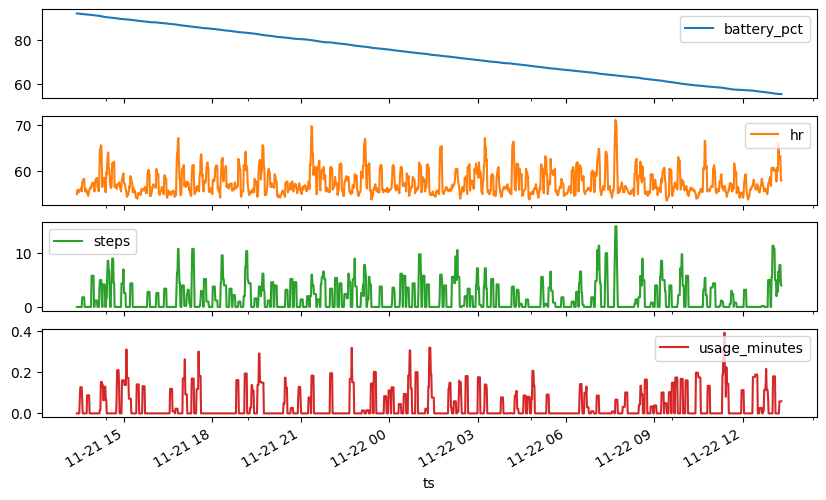

In [5]:
sub[['battery_pct','hr','steps','usage_minutes']].rolling(5).mean().plot(subplots=True, figsize=(10,6))

Text(0.5, 1.0, 'battery_pct dist')

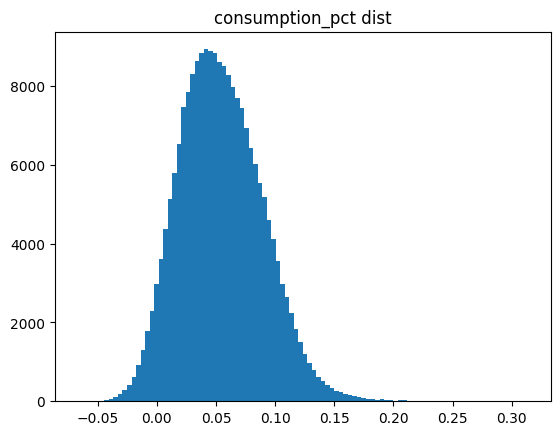

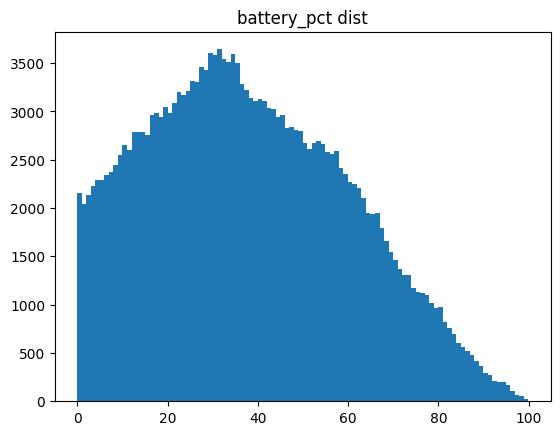

In [ ]:
plt.hist(df['consumption_pct'], bins=100)
plt.title("consumption_pct dist")

plt.figure()
plt.hist(df['battery_pct'], bins=100)
plt.title("battery_pct dist")

In [7]:
assert df.sort_values(["user_id", "ts"]).equals(df)

## Evaluate Feature Engineering

In [5]:
df_feats = pd.read_parquet("../data/sample_events.parquet")

fe = FeatureEngineer(battery_threshold=0.10, resample="1min")
df_feats = fe.featurize(df_feats)

df_feats.head(11)

,ts,user_id,battery_pct,hr,steps,usage_minutes,sync_event,acc_x,acc_y,acc_z,...,battery_lag_5m,hr_lag_5m,sync_lag_5m,battery_lag_10m,hr_lag_10m,sync_lag_10m,battery_lag_30m,hr_lag_30m,sync_lag_30m,target_minutes
0,2025-11-26 01:16:00,1,36.816681,72,0,0.00,0,-0.236347,0.113535,-0.101701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,553.0
1,2025-11-26 01:17:00,1,36.758862,69,0,0.67,0,0.088583,0.063190,0.004026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,552.0
2,2025-11-26 01:18:00,1,36.684737,68,0,0.00,0,-0.017243,-0.087786,0.004221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551.0
3,2025-11-26 01:19:00,1,36.597476,72,0,0.00,0,-0.045452,-0.008534,0.150319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0
4,2025-11-26 01:20:00,1,36.533996,70,0,0.00,0,-0.091545,-0.006973,-0.084995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.0
5,2025-11-26 01:21:00,1,36.493341,70,0,0.00,0,0.010316,-0.062167,0.027572,...,36.816681,72.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,548.0
6,2025-11-26 01:22:00,1,36.421923,69,0,0.00,0,-0.058080,-0.011075,0.204203,...,36.758862,69.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,547.0
7,2025-11-26 01:23:00,1,36.339368,73,0,0.00,0,-0.223877,0.175540,-0.026419,...,36.684737,68.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,546.0
8,2025-11-26 01:24:00,1,36.259197,69,0,0.00,0,0.083898,0.093110,0.028559,...,36.597476,72.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,545.0
9,2025-11-26 01:25:00,1,36.201294,72,0,0.00,0,0.049673,0.032928,-0.000119,...,36.533996,70.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,544.0


Text(0.5, 1.0, 'time to 10%')

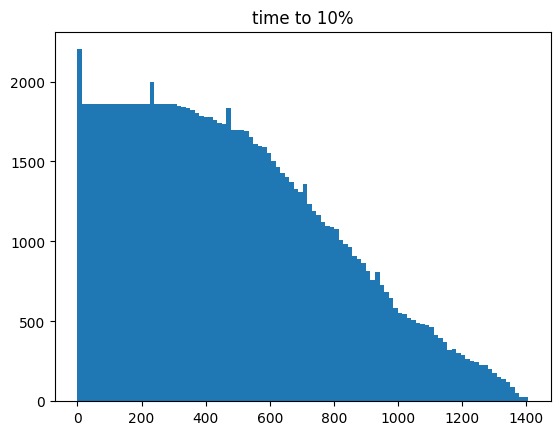

In [9]:
df_feats['target_minutes'].dropna().describe()
plt.hist(df_feats['target_minutes'].dropna(), bins=100); plt.title("time to 10%")

In [12]:
# take rows with non-null target
df_feats[df_feats['target_minutes'].notna()].sample(5).head()

,ts,user_id,battery_pct,hr,steps,usage_minutes,sync_event,acc_x,acc_y,acc_z,...,battery_lag_5m,hr_lag_5m,sync_lag_5m,battery_lag_10m,hr_lag_10m,sync_lag_10m,battery_lag_30m,hr_lag_30m,sync_lag_30m,target_minutes
35270,2025-11-21 21:58:00,34,21.518108,66,0,0.0,0,0.065271,0.004894,-0.015766,...,21.987538,67.0,0.0,22.505260,87.0,0.0,24.417187,64.0,0.0,205.0
50047,2025-11-22 06:06:00,49,10.995956,76,26,0.0,0,2.658836,-1.020888,-0.996302,...,11.376473,72.0,0.0,11.806963,80.0,0.0,13.491961,73.0,0.0,136.0
97260,2025-11-22 02:23:00,97,11.437754,74,0,0.0,0,-0.038097,0.175282,-0.121246,...,11.583778,72.0,0.0,11.684728,72.0,0.0,12.320606,74.0,0.0,334.0
75577,2025-11-22 02:20:00,75,7.122065,55,0,0.0,0,-0.112803,0.108039,-0.067772,...,7.415067,56.0,0.0,7.747948,54.0,0.0,8.824201,52.0,0.0,122.0
64332,2025-11-21 14:15:00,63,33.960690,72,0,0.0,0,-0.054594,-0.018034,0.159384,...,34.262352,90.0,0.0,34.588285,73.0,0.0,35.708078,71.0,0.0,607.0


In [6]:
df_feats.columns

Index(['ts', 'user_id', 'battery_pct', 'hr', 'steps', 'usage_minutes',
       'sync_event', 'acc_x', 'acc_y', 'acc_z', 'consumption_pct', 'hour',
       'dayofweek', 'battery_mean_5m', 'battery_std_5m', 'battery_min_5m',
       'battery_max_5m', 'hr_mean_5m', 'hr_std_5m', 'sync_sum_5m',
       'battery_mean_15m', 'battery_std_15m', 'battery_min_15m',
       'battery_max_15m', 'hr_mean_15m', 'hr_std_15m', 'sync_sum_15m',
       'battery_mean_30m', 'battery_std_30m', 'battery_min_30m',
       'battery_max_30m', 'hr_mean_30m', 'hr_std_30m', 'sync_sum_30m',
       'battery_mean_60m', 'battery_std_60m', 'battery_min_60m',
       'battery_max_60m', 'hr_mean_60m', 'hr_std_60m', 'sync_sum_60m',
       'battery_lag_1m', 'hr_lag_1m', 'sync_lag_1m', 'battery_lag_5m',
       'hr_lag_5m', 'sync_lag_5m', 'battery_lag_10m', 'hr_lag_10m',
       'sync_lag_10m', 'battery_lag_30m', 'hr_lag_30m', 'sync_lag_30m',
       'target_minutes'],
      dtype='object')

In [1]:
df_feats.sort_values("ts").head()

NameError: name 'df_feats' is not defined